

### DATA 

| Column Name               | Description                                     |
|---------------------------|-------------------------------------------------|
| Catergory                | Year    |
| Per Capita Consumption(Kwh)  | Per person electricity Consumption of whole year             |
| Per_chg_over_years         | Year on Year change in per capita consumption             |

Purpose :
- Insight of the consumption and trends that indicates the fiscal state of the contry and the growing demand 
 

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as  plt
import plotly.graph_objects as go
import plotly.express as px

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('/kaggle/input/per-capita-consumption-of-electricity-all-india/per-capita-consumption-all_india.csv')
df.head(10)

,Category,Per Capita Consumption(Kwh),Per_chg_over_years
0,2002-03,566.690000,0.000000
1,2003-04,592.000000,4.275338
2,2004-05,612.498576,3.346714
3,2005-06,631.410000,2.995110
4,2006-07,671.890000,6.024796
5,2007-08,717.130000,6.308480
6,2008-09,733.540000,2.237097
7,2009-10,778.705969,5.800131
8,2010-11,818.746167,4.890429
9,2011-12,883.631491,7.343030


In [3]:
df.tail()

,Category,Per Capita Consumption(Kwh),Per_chg_over_years
15,2017-18,1149.102247,2.381884
16,2018-19,1180.856498,2.689086
17,2019-20,1207.890925,2.238151
18,2020-21,1160.543093,-4.079800
19,2021-22,1255.139534,7.536727


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Category                     20 non-null     object 
 1   Per Capita Consumption(Kwh)  20 non-null     float64
 2   Per_chg_over_years           20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 608.0+ bytes


In [5]:
df.describe()

,Per Capita Consumption(Kwh),Per_chg_over_years
count,20.000000,20.000000
mean,901.840496,3.863178
std,231.731267,2.680278
min,566.690000,-4.079800
25%,705.820000,2.612286
50%,899.021063,4.236452
75%,1128.574534,5.856297
max,1255.139534,7.536727


In [6]:
df.isna()

,Category,Per Capita Consumption(Kwh),Per_chg_over_years
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [7]:
df.isnull().value_counts

<bound method DataFrame.value_counts of     Category  Per Capita Consumption(Kwh)  Per_chg_over_years
0      False                        False               False
1      False                        False               False
2      False                        False               False
3      False                        False               False
4      False                        False               False
5      False                        False               False
6      False                        False               False
7      False                        False               False
8      False                        False               False
9      False                        False               False
10     False                        False               False
11     False                        False               False
12     False                        False               False
13     False                        False               False
14     False                  

EDA and realated questions that can be answered

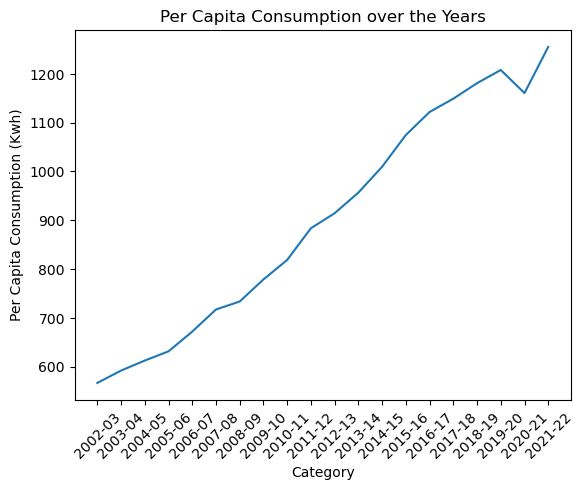

In [8]:
sns.lineplot(data=df,x='Category',y='Per Capita Consumption(Kwh)')
plt.title('Per Capita Consumption over the Years')
plt.xlabel('Category')
plt.ylabel('Per Capita Consumption (Kwh)')
plt.xticks(rotation=45)
plt.show()

the overall trend in per capita consumption over the years

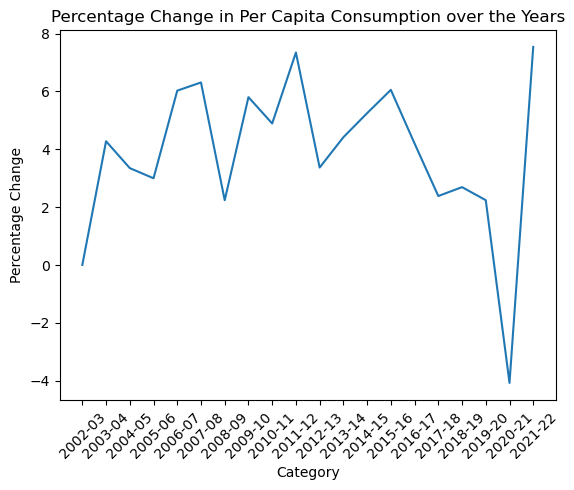

In [9]:
sns.lineplot(data=df, x='Category', y='Per_chg_over_years')
plt.title('Percentage Change in Per Capita Consumption over the Years')
plt.xlabel('Category')
plt.ylabel('Percentage Change')
plt.xticks(rotation=45)
plt.show()

unusal in 2017 to 2020 

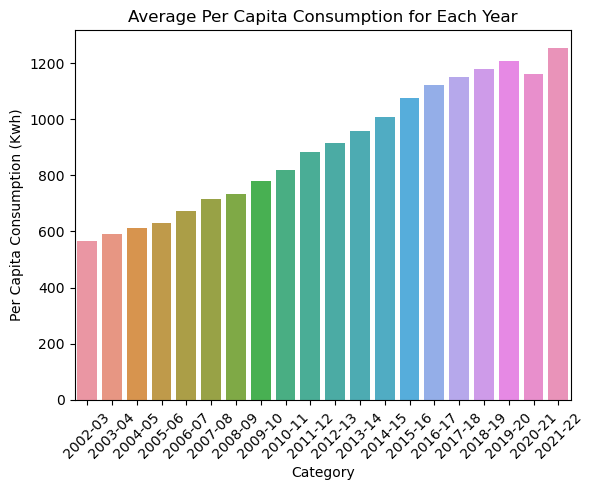

In [10]:
avg_per_capita = df.groupby('Category')['Per Capita Consumption(Kwh)'].mean()
sns.barplot(data=df, x='Category', y='Per Capita Consumption(Kwh)')
plt.title('Average Per Capita Consumption for Each Year')
plt.xlabel('Category')
plt.ylabel('Per Capita Consumption (Kwh)')
plt.xticks(rotation=45)
plt.show()

In [11]:
max_change_year = df[df['Per_chg_over_years'] == df['Per_chg_over_years'].max()]['Category'].values[0]
print("Year with the highest percentage change:", max_change_year)

Year with the highest percentage change: 2021-22


quite obvious pandemic 

In [12]:
total_consumption = df['Per Capita Consumption(Kwh)'].sum()
print("Total per capita consumption:", total_consumption , " Kwh")

Total per capita consumption: 18036.809926  Kwh


In [13]:

max_increase_year = df[df['Per_chg_over_years'] == df['Per_chg_over_years'].min()]['Category'].values[0]
print("Year with the highest increase in per capita consumption:", max_increase_year," Kwh")


Year with the highest increase in per capita consumption: 2020-21  Kwh


In [14]:
import plotly.express as px

fig = px.scatter(df, y='Per_chg_over_years', x='Per Capita Consumption(Kwh)', trendline='ols')
fig.show()


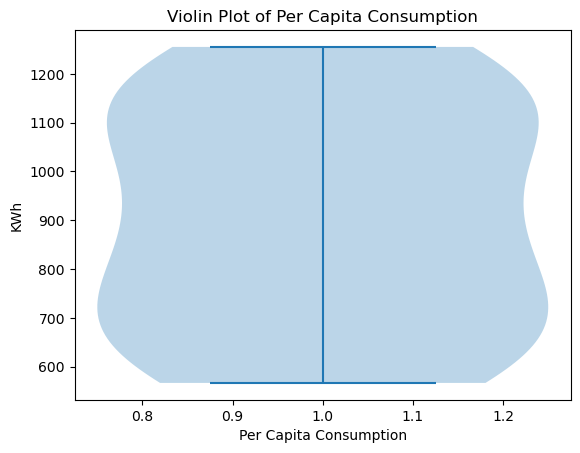

In [15]:
plt.violinplot(df['Per Capita Consumption(Kwh)'])
plt.xlabel('Per Capita Consumption')
plt.ylabel('KWh')
plt.title('Violin Plot of Per Capita Consumption')
plt.show()


/tmp/ipykernel_20/2295306640.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



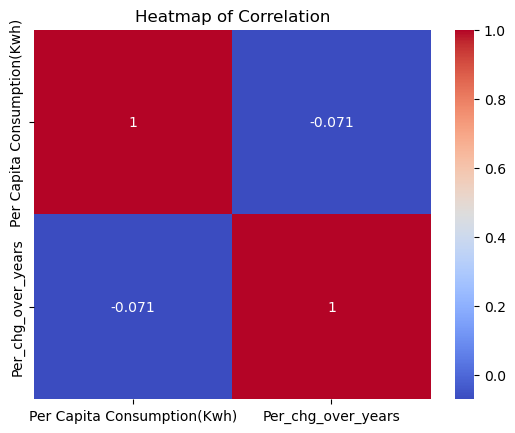

In [16]:
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation')
plt.show()


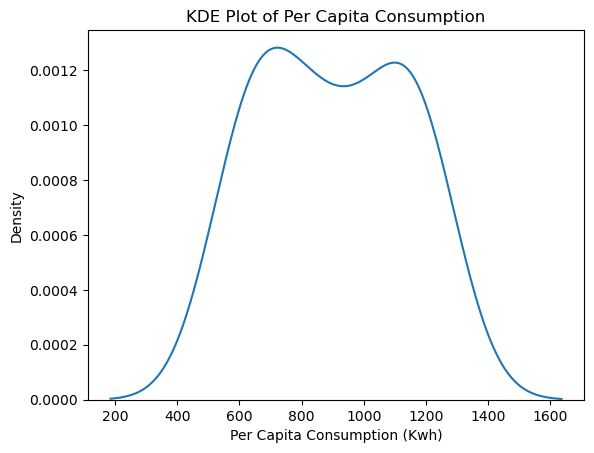

In [17]:
sns.kdeplot(data=df, x='Per Capita Consumption(Kwh)')
plt.xlabel('Per Capita Consumption (Kwh)')
plt.ylabel('Density')
plt.title('KDE Plot of Per Capita Consumption')
plt.show()


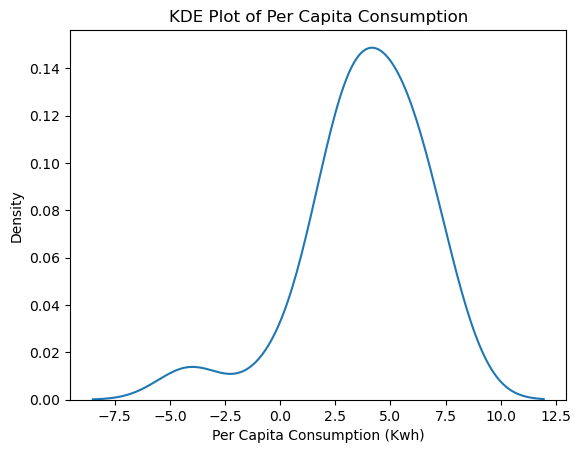

In [18]:
sns.kdeplot(data=df, x='Per_chg_over_years')
plt.xlabel('Per Capita Consumption (Kwh)')
plt.ylabel('Density')
plt.title('KDE Plot of Per Capita Consumption')
plt.show()


In [19]:
df.head()

,Category,Per Capita Consumption(Kwh),Per_chg_over_years
0,2002-03,566.690000,0.000000
1,2003-04,592.000000,4.275338
2,2004-05,612.498576,3.346714
3,2005-06,631.410000,2.995110
4,2006-07,671.890000,6.024796


In [20]:

fig = go.Figure(data=go.Scatterpolar(
    r=df['Per Capita Consumption(Kwh)'],
    theta=df['Category'],
    fill='toself'
))
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True
        )
    ),
    showlegend=False
)
fig.show()


In [21]:
import plotly.express as px

fig = px.bar_polar(df, theta='Per Capita Consumption(Kwh)', r='Category', color='Category',
                   title='Bar Polar Plot', template='plotly_dark')

fig.show()


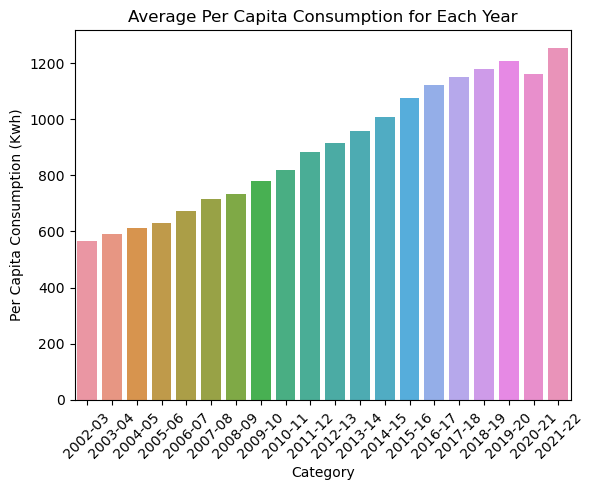

In [22]:
avg_per_capita = df.groupby('Category')['Per Capita Consumption(Kwh)'].mean()
sns.barplot(data=df, x='Category', y='Per Capita Consumption(Kwh)')
plt.title('Average Per Capita Consumption for Each Year')
plt.xlabel('Category')
plt.ylabel('Per Capita Consumption (Kwh)')
plt.xticks(rotation=45)
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Category                     20 non-null     object 
 1   Per Capita Consumption(Kwh)  20 non-null     float64
 2   Per_chg_over_years           20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 608.0+ bytes
